In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from pandasql import sqldf
sql=lambda q: sqldf(q,globals())

In [10]:
df = pd.read_csv("ICICI Bank Account Statement_new.csv")

In [11]:
df.head()

,S No.,Value Date,Transaction Date,Cheque Number,Transaction Remarks,Withdrawal Amount (INR ),Deposit Amount (INR),Balance (INR
0,1,01/02/2019,01/02/2019,NaN,UPI/903209920472/UPl/meetabhilash. 1 1/Axis Ba...,0.0,200.0,208.03
1,2,01/02/2019,01/02/2019,NaN,ATM/S1VDK549/CASHWDL/01-02-19,200.0,0.0,8.03
2,3,02/02/2019,02/02/2019,NaN,JPI/903319972440/UPl/upendrajayara m@/IDBI Ban...,0.0,1000.0,1008.03
3,4,02/02/2019,02/02/2019,NaN,JPI/903344052667/0id7239682520@ Oladd-money@pa...,22.0,0.0,986.03
4,5,03/02/2019,04/02/2019,NaN,UPI/903435575966/Oid7243154329@ O/add-money@pa...,46.0,0.0,940.03


In [13]:
df.columns

Index(['Value Date ', 'Transaction Date ', 'Cheque Number ',
       'Transaction Remarks ', 'Withdrawal Amount (INR ) ',
       'Deposit Amount (INR) ', 'Balance (INR '],
      dtype='object')

In [12]:
df.set_index("S No. ",inplace=True)

In [46]:
sql("""
SELECT `Transaction Date `,SUM(`Withdrawal Amount (INR ) `) as TotalWithdraw
FROM df
GROUP BY `Transaction Date `
ORDER BY TotalWithdraw desc
""")

,Transaction Date,TotalWithdraw
0,05/03/2019,29698.90
1,05/02/2019,14181.80
2,06/03/2019,13730.00
3,11/03/2019,10280.46
4,13/03/2019,10086.00
5,06/02/2019,6058.00
6,26/03/2019,5000.00
7,12/03/2019,2542.00
8,07/02/2019,2009.90
9,22/03/2019,2000.00


In [47]:
df_trans_date=sql("""
SELECT `Transaction Date `,SUM(`Withdrawal Amount (INR ) `) as TotalWithdraw
FROM df
GROUP BY `Transaction Date `
ORDER BY TotalWithdraw desc
LIMIT 10
""")

In [48]:
df_trans_date.set_index("Transaction Date ",inplace=True)

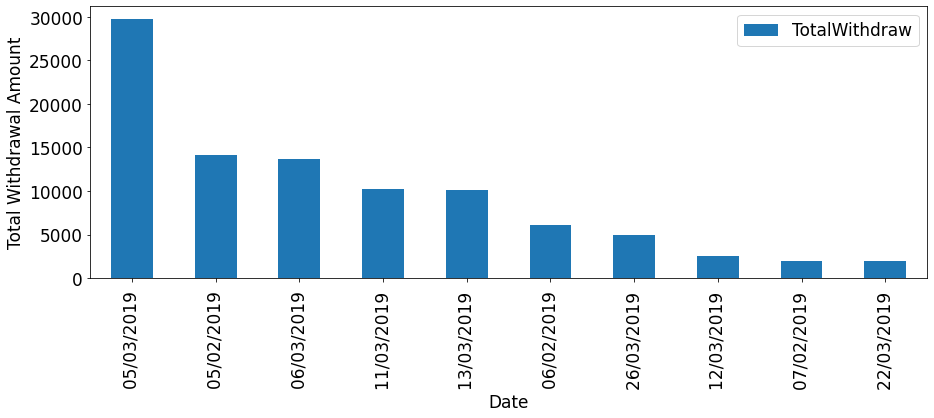

In [49]:
df_trans_date.plot(kind='bar')

plt.rcParams.update({'font.size': 17})
plt.rcParams["figure.figsize"] = (15,5)
plt.ylabel("Total Withdrawal Amount")
plt.xlabel("Date")

plt.show()